<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#0000FF size=6>
 پیاده‌سازی پرسپترون (Perceptron)
        </font>
		<hr>
        <b>متن گزارش در محیط ژوپیتر محلی (local) به درستی نمایش داده می‌شود، ولی روی گوگل کولب مشکل دارد.</b>
        <br>
در ابتدا تعدادی از متغیرهایی که در ادامه نیاز خواهیم داشت را مقداردهی اولیه می‌کنیم. <code>n_samples</code> تعداد نمونه‌های مجموعه داده، <code>n_features</code> تعداد ویژگی‌ها، <code>true_label</code> برچسب مثبت و <code>false_label</code> برچسب منفی است. در جزوه‌ی استاد برچسب منفی $-1$ در نظر گرفته شده، ولی ما در اینجا آن را $0$ در نظر می‌گیریم. با این حال می‌توان به راحتی تغییرش داد.    
	</font>
</div>

In [104]:
n_samples   = 100
n_features  = 2
true_label  = 1
false_label = 0

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        حال همان طور که در راهنمای پروژه گفته شده ابتدا به کمک قطعه کد زیر مجموعه داده‌ای می‌سازیم که به صورت خطی جدایی‌پذیر باشد. تعداد نمونه‌ها و ویژگی‌ها را همان طور که در ابتدا مقداردهی کرده بودیم به تابع <code>make_blobs</code> می‌دهیم.
	</font>
</div>

In [105]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=n_samples, n_features=n_features, centers=2, random_state=41)

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        در ادامه کلاس <code>F</code> را تعریف کرده و متد <code>sign</code> را همان طور که از ما خواسته شده مطابق تعریف تابع $sign$ پیاده‌سازی می‌کنیم. این متد در صورتی که مقدار نامنفی دریافت کند، مقداری که برای برچسب مثبت تعریف کردیم (<code>true_label</code>) و در غیر این صورت، مقداری که برای برچسب منفی تعریف کردیم (<code>false_label</code>) را بازمی‌گرداند.
	</font>
</div>

In [106]:
class F:
    @staticmethod
    def sign(x):
        return true_label if (x >= 0) else false_label

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        از کتابخانه‌ی <code>numpy</code> استفاده خواهیم کرد؛ پس آن را ایمپورت می‌کنیم.
	</font>
</div>

In [107]:
import numpy as np

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        کلاس <code>Perceptron</code> را تعریف می‌کنیم. مطابق آنچه که در اسلاید مربوطه گفته شده، بردار وزن اولیه $W^{(0)}$ و بایاس اولیه $b^{(0)}$ را به صورت تصادفی انتخاب می‌کنیم.
        <br>
        همچنین متد <code>forward</code> را به گونه‌ای تعریف می‌کنیم که خروجی پرسپترون، یعنی $sign(W.X+b)$ را محاسبه کند که <code>input</code> همان ورودی $X$ پرسپترون است.
	</font>
</div>

In [108]:
class Perceptron:
    def __init__(self, input_size):
        self.W = np.random.rand(input_size)
        self.b = np.random.rand()

    def forward(self, input):
        return F.sign(self.W @ input + self.b)

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        حال کلاس <code>Optimizer</code> را تعریف می‌کنیم که با دریافت مدل به آن دسترسی پیدا کرده و با اعمال متد <code>update</code>، وزن‌ها و بایاس مدل را مطابق یک مرحله‌ی یادگیری که در الگوریتم یادگیری پرسپترون بیان شد بروزرسانی می‌کند.
        <br>
        این بروزرسانی به این صورت است که اگر در مرحله‌ی $k$ام بردار وزن برابر $W^{(k)}$ و بایاس برابر $b^{(k)}$ باشد، در مرحله‌ی $(k + 1)$ام خواهیم داشت:
        <br>
        <p>
            $W^{(k + 1)} = W^{(k)} + (y_i - \hat{y_i}^{(k)})X$
            <br>
            $b^{(k + 1)} = b^{(k)} + (y_i - \hat{y_i}^{(k)})$
        </p>
        که $X$ ورودی پرسپترون و $\hat{y_i}^{(k)}$ خروجی آن به ازای بردار وزن و بایاس در مرحله‌ی $k$ام است و در متد <code>update</code> به ترتیب با <code>x</code> و <code>y_hat</code> نشان داده شده است.
	</font>
</div>

In [109]:
class Optimizer:
    def __init__(self, model):
        self.model = model

    def update(self, x, y, y_hat):
        self.model.W += (y - y_hat) * x
        self.model.b += (y - y_hat)

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        یک نمونه از <code>Perceptron</code> با سایز ورودی <code>n_features</code> که در ابتدا مقداردهی کردیم تعریف می‌کنیم.
        <br>
         یک نمونه از<code>Optimizer</code> هم ایجاد می‌کنیم و نمونه‌ی پرسپترون را به عنوان مدل ورودی به آن می‌دهیم.
	</font>
</div>

In [110]:
perceptron = Perceptron(n_features)
optimizer = Optimizer(perceptron)

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        تعداد دفعاتی که می‌خواهیم مرحله‌ی یادگیری را انجام دهیم که شامل پیمایش مجموعه داده و بروزرسانی وزن‌ها و بایاس است را <code>n_iter</code> می‌نامیم. به این تعداد روی مجموعه داده حرکت کرده و در هر مرحله به ازای هر نمونه از مجموعه داده، متد <code>update</code> را فراخوانی می‌کنیم.
	</font>
</div>

In [111]:
n_iter = 1000

for _ in range(n_iter):
    for x, y in zip(X, Y):
        optimizer.update(x, y, perceptron.forward(x))

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        در نهایت با استفاده از کتابخانه‌ی <code>matplotlib</code> و با فرض آنکه تعداد ویژگی‌ها و در نتیجه سایز ورودی پرسپترون برابر $2$ است، خط جداکننده را به همراه نمونه‌های مجموعه داده در فضای دوبعدی ترسیم می‌کنیم.
        <br>
        برای ترسیم خط جداکننده از این موضوع استفاده می‌کنیم که اگر بردار وزن نهایی $W = \begin{bmatrix} w_1 & w_2 \end{bmatrix}^T$ و بایاس نهایی $b$ باشد، آنگاه معادله‌ی خط به صورت زیر خواهد بود:
        <p>
        $w_1x_1 + w_2x_2 + b = 0$
        </p>
        که از نقاط $(0, \frac{-b}{w_2})$ و $(\frac{-b}{w_1}, 0)$ عبور می‌کند.
	</font>
</div>

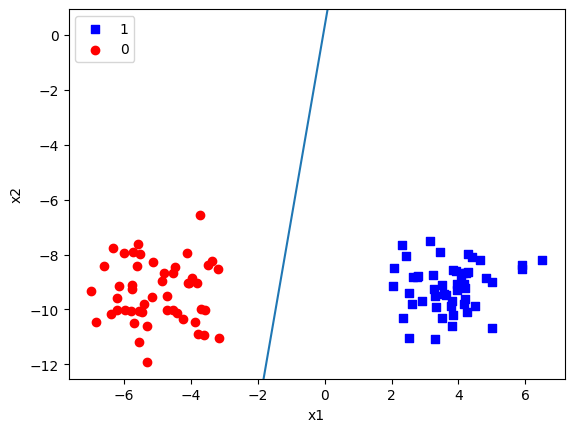

In [112]:
from matplotlib import pyplot as plt

plt.scatter(X[:, 0][Y == true_label], X[:, 1][Y == true_label], color='blue', marker='s', label=str(true_label))
plt.scatter(X[:, 0][Y == false_label], X[:, 1][Y == false_label], color='red', marker='o', label=str(false_label))

plt.axline((0, -perceptron.b / perceptron.W[1]), (-perceptron.b / perceptron.W[0], 0))

plt.legend(loc='upper left')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()